<div style="text-align: center;">
   <h1>Linear Regression for Predicting Profit from Population Using Gradient Descent</h1>
</div>

Chunk processed successfully.
✅ Data loaded successfully.
Data (first 10 rows): 
    Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
5      8.3829  11.8860
6      7.4764   4.3483
7      8.5781  12.0000
8      6.4862   6.5987
9      5.0546   3.8166
############################################################
📊 Data description: 
        Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000
############################################################


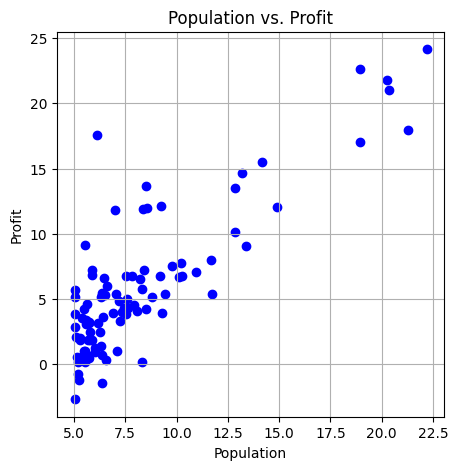

Data (first 10 rows with Ones column): 
    Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233
5     1      8.3829  11.8860
6     1      7.4764   4.3483
7     1      8.5781  12.0000
8     1      6.4862   6.5987
9     1      5.0546   3.8166


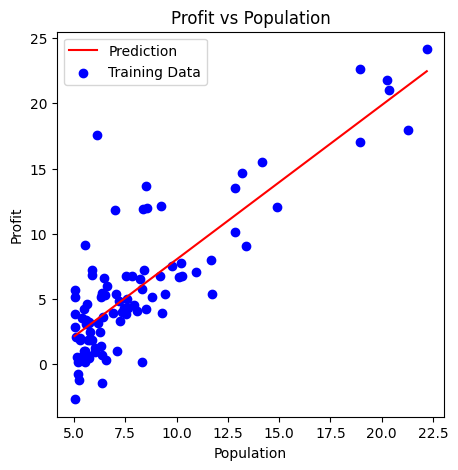

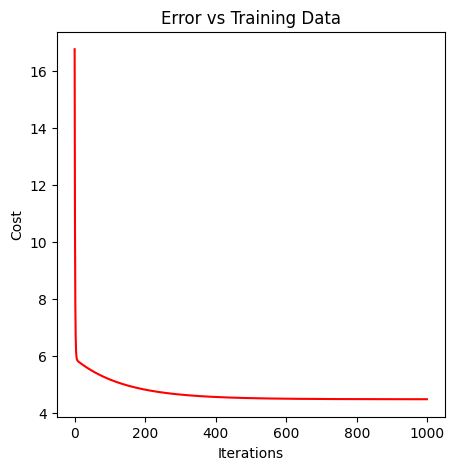

In [8]:
# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 🛤️ Path to your text file
path_file = "data/first_data.txt"

# 📋 Initialize an empty DataFrame
data = pd.DataFrame()

# 📐 Define the chunk size for reading the file
chunk_size = 1000

# 📥 Read the file in chunks to handle large datasets efficiently
try:
    for chunk in pd.read_csv(path_file, header=None, names=["Population", "Profit"], chunksize=chunk_size):
        # ➕ Concatenate the chunks to the main DataFrame
        data = pd.concat([data, chunk], ignore_index=True)
        print("Chunk processed successfully.")
except FileNotFoundError:
    print(f"❌ Error: File '{path_file}' not found.")
except pd.errors.EmptyDataError:
    print("❌ Error: The file is empty.")
except pd.errors.ParserError:
    print("❌ Error: Parsing the file failed.")
finally:
    if len(data) > 0:
        print("✅ Data loaded successfully.")
    else:
        print("⚠️ Something went wrong, data is empty.")

# 👀 Display the first 10 rows of data
print("Data (first 10 rows): \n", data.head(10))

print("#" * 60)

# 📊 Display the summary statistics of the data
print("📊 Data description: \n", data.describe())

print("#" * 60)

# 📈 Plot the original Population vs. Profit data
plt.figure(figsize=(5, 5))
plt.scatter(data['Population'], data['Profit'], color='blue')
plt.title('Population vs. Profit')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# ➕ Add a column of ones to the data to account for the intercept term in linear regression
data.insert(0, "Ones", 1)

# 👀 Display the first 10 rows after adding the "Ones" column
print("Data (first 10 rows with Ones column): \n", data.head(10))

# 🧮 Define X (independent variable matrix) and y (dependent variable vector)
cols = data.shape[1]  # 🧮 Get the number of columns
x = data.iloc[:, 0:cols-1]  # X contains all columns except the last one (Ones, Population)
y = data.iloc[:, cols-1:cols]  # y contains only the last column (Profit)

# 🔄 Convert X and y to NumPy matrices
x = np.matrix(x.values)
y = np.matrix(y.values)

# 🚀 Initialize theta (parameters) with zeros (2 parameters for intercept and slope)
theta = np.matrix(np.array([0, 0]))

# 💡 Cost function to compute the squared error for linear regression
def compute_cost(x, y, theta):
    e = np.power(((x * theta.T) - y), 2)  # Calculate squared error
    return np.sum(e) / (2 * len(x))  # Return the cost (mean squared error)

# 🔁 Gradient descent function to update theta parameters iteratively
def gradient_descent(x, y, theta, iters, alpha):
    temp = np.matrix(np.zeros(theta.shape))  # 📝 Temporary theta matrix for updates
    arguments = int(theta.shape[1])  # ℹ️ Number of parameters (columns in theta)
    cost = np.zeros(iters)  # 🧮 Array to store the cost after each iteration
    
    # 🔄 Perform gradient descent for a specified number of iterations
    for i in range(iters):
        err = (x * theta.T) - y  # ❗ Error term (difference between predictions and actual values)
        
        # 🔄 Update each parameter (theta) using gradient descent
        for j in range(arguments):
            term = np.multiply(err, x[:, j])  # ⚙️ Compute the gradient
            temp[0, j] = theta[0, j] - (alpha / len(x)) * np.sum(term)  # 🔧 Update theta
        
        theta = temp  # ✅ Set the updated theta
        cost[i] = compute_cost(x=x, y=y, theta=theta)  # 🧮 Compute and store the cost for this iteration
    
    return theta, cost  # 🏁 Return the optimized theta and the cost history

# 🧪 Set the learning rate (alpha) and number of iterations
alpha = 0.02
iters = 1000

# 🔧 Perform gradient descent to minimize the cost function and find the optimal theta
t, cost = gradient_descent(x=x, y=y, theta=theta, iters=iters, alpha=alpha)

# 📏 Generate values for the line of best fit (Predicted Profit)
x_line = np.linspace(data.Population.min(), data.Population.max(), 100)
f = t[0, 0] + (t[0, 1] * x_line)  # 🧮 Linear equation for the fitted line

# 🎨 Plot the training data and the fitted line
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_line, f, 'r', label="Prediction")  # 📈 Fitted line in red
ax.scatter(data.Population, data.Profit, color='blue', label="Training Data")  # 🔵 Training data points
ax.legend(loc=2)
ax.set_xlabel("Population")
ax.set_ylabel("Profit")
ax.set_title("Profit vs Population")

# 📉 Plot the cost function history (Error vs. Iterations)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(np.arange(iters), cost, 'r')  # 📊 Cost vs Iterations
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_title("Error vs Training Data")

# 🎉 Display the plots
plt.show()
